> Created on Wed Mar 27 20:33:48 2019 @author: Richie Bao-caDesign设计(cadesign.cn) __+updated on Wed Nov 25 23:31:32 2020 by Richie Bao

## 1.城市生活圈，DBSCAN连续距离聚类，卡方分布及独立性检验
比尔·希利尔提出“空间”是物质形态和社会经济活动相互作用的媒介物：社会经济活动不仅具有空间性，即社会经济活动的展开依赖其在空间上的分布，而且它们的空间组织形式受制于空间自身的规律。凯文·林奇认为物质环境的变化对社会只有微小的影响，正如社会变革（即使是革命）对城市空间也只产生非直接的影响一样。社会结构和物质空间形态之间有着内在的关系，它们通过其中的变量长期地相互作用着，也就是通过人的行动与态度相互作用着。城市的物质空间形态和社会行为的发展是彼此相互依赖，长期渐进式、小规模变化、无序的，逐渐的调整、优化积累的结果。

在社会经济活动方面，日本在《农村生活环境整备计划》中提出生活圈概念，即是指某一特定地理、社会村落范围内人们日常生产、生活的诸多活动在地理平面上的分布，以一定人口的村落、一定距离圈域作为基础，将生活圈按照村落-大字-旧村-市町村-地方都市圈进行层次划分。自日本提出“生活圈”概念以来，国内就城市发展逐渐从大尺度的宏观叙事转向小尺度的空间调整，将居民视为均质整体转向关注不同社会群体的多元需求， 逐渐开始关注城市生活空间的构建与居民生活质量的提升。国内的相关研究也在持续展开，涉及生活圈规划方法和策略，生活圈的界定与测度，以及多个城市15分钟生活圈的划定与空间优化等。当前的研究多以规划理念、策略居多，定量分析上通常位于一个固定的时间距离下分析一个或多个目标位置范围下的居民日常活动，如出行路径和范围、以及服务设施的空间布局结构等。

从单纯的关注物质空间开始转向考虑其背后的社会属性，以生活圈作为切入点来考虑城市微更新等提升居民生活品质需求的规划策略，为达到具体落实的目的，有必要量化生活圈的空间分布，社会属性的空间结构，以及动态的连续时间距离层级变化关系，从而使得生活圈规划中涉及到的人文关怀、活力环境以及宜人的绿色休闲网络等内容得以合理布局，落实到发挥其最大价值的区域内。

### 1.1 DBSCAN聚类算法

在聚类部分，详细阐述了K-Means算法，K-Means的参数输入需要确定分组的数量，但是要将兴趣点(points of interest,POI)数据点按照地理空间分布的距离进行聚类，不能确定分组的数量，则K-Means算法无法实现该需求。分析POI空间分布，则使用DBSCAN（Density-Based Spatial Clustering of Applications with Noise.）聚类分析。该算法的实现在Python程序设计语言机器学习开源库scikit-learn的sklearn.cluster类中，`class sklearn.cluster.DBSCAN(eps,min_samples,*)`，其关键参数设置中eps为设置采样点之间的最大距离；min_samples为设置邻域样本数量（含自身）。

DBSCAN可以解决K-Means,MeanShift,AffinityPropagation,MiniBatchKMeans,GaussianMixture等算法失败的非凸问题（参看Sklearn官网聚类部分提供的不同聚类算法比较代码结果图示中双弯月一行）。DBSCAN算法的主要思想是，一个簇是一个被低密度区域包围的高密度区域（其形状没有限制），不需要预先给定预期簇的数量。这个过程主要基于一个度量函数（通常是欧氏距离，即eps）和一个半径（理解为邻域样本的数量）。给定一个样本$x_{i} $，观察其周边样本，如果它被至少$n_{min}$个点包围，则其成为一个核心点：$N(d( \overline{ x_{i} },\overline{ x_{j} } ) \leq  \epsilon ) \geq  n_{min} $。如果$d( \overline{ x_{i} },\overline{ x_{j} } ) \leq  \epsilon$，则一个样本$ x_{j}$被定义为接近核心点$ x_{i}$。以此类推，对于一个可形成簇的点的序列，如果$x_{i}  \mapsto x_{i+1}  \mapsto  \ldots  \mapsto x_{j} $，各个点逐一连续靠近，则$x_{i} $和$x_{i} $被认为是可达的，即包含在同一簇中。进一步讲，如果给定一个样本$x_{k} $，如果$x_{i} $和$x_{j} $都靠近$x_{k} $，则它们是可达的，紧密靠近的。如果对于所有样本不满足上述要求则认定为是噪音。

对于满足距离(eps)要求没有几何结构限制的样本点归为一个簇，同时，如果临近的簇靠近这个簇，有样本满足距离要求，则这两个簇可以合并为一个簇，否则是拓扑分离的。当扫描完所有区域后，在所有簇之间也有可能有单独的点，即噪音点，不能满足距离要求下划分到任何簇中。

比较DBSCAN和K-Means算法聚类非凸几何结构的数据集，DBSCAN具有较好的表现。

>  参考文献</br>
> 1. Giuseppe Bonaccorso.Mastering Machine Learning Algorithms: Expert techniques for implementing popular machine learning algorithms, fine-tuning your models, and understanding how they work[M].Birmingham:Packt Publishing.January, 2020.

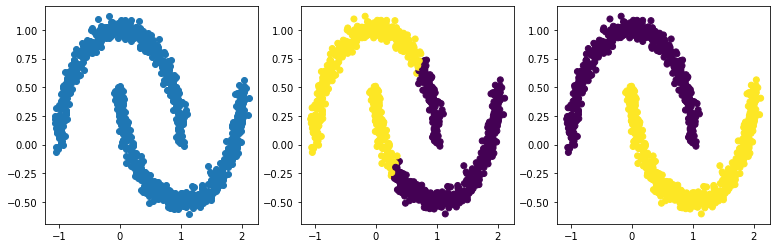

In [19]:
from sklearn.datasets import make_moons
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

nb_samples=1000
X,y=make_moons(n_samples=nb_samples, noise=0.05)

fig, axs=plt.subplots(1,3,figsize=(26/2,8/2))
axs[0].scatter(X[:, 0], X[:, 1])

#K-Means聚类
clustering_KMeans=cluster.KMeans(n_clusters=2).fit(X)
pred_KMeans=clustering_KMeans.predict(X)
axs[1].scatter(X[:, 0], X[:, 1],c=pred_KMeans)

#DBSCAN聚类
clustering_DBSCAN=cluster.DBSCAN(eps=0.3,min_samples=20).fit(X)
pred_DBSCAN=clustering_DBSCAN.labels_.astype(np.int)
axs[2].scatter(X[:, 0], X[:, 1],c=pred_DBSCAN)

plt.show()

### 1.2 卡方分布与独立性检验
#### 1.2.1 卡方分布(Chi-Square Distribution,χ²-distribution)
若k个随机变量$Z_{1} , \ldots  \ldots ,Z_{k}$，是相互独立，符合标准正态分布的随机变量（数学期望为0，方差为1），则随机变量$Z$的平方和$X= \sum_{i=1}^k   x_{i} ^{2}$被称为服从自由度为$k$的卡方分布，记作$X \sim  x^{2} (k)$或$X \sim   x_{k} ^{2} $。卡方分布的概率密度函数（即计算卡方分布曲线的公式）为：$f_{k} (x)= \frac{  \frac{1}{2} ^{ \frac{k}{2} } }{ \Gamma ( \frac{k}{2} )}  x^{ \frac{k}{2}-1 } e^{ \frac{-x}{2} }  $，其中$x \geq 0$，当$x  \leq 0$时$f_{k} (x)=0$。$\Gamma $代表Gamma函数。在python中绘制卡方分布，仍旧与正态分布、t分布一样，直接由SciPy库完成。

因为卡方分布表述的是多个事件（随机变量）的机率，每个事件符合标准正态分布，而标准正态分布表为记录对应横轴刻度的机率表，卡方分布表则是记录对应几率的横轴刻度表。

对于卡方分布的理解，可以结合比较均值抽样分布（于标准误部分阐述），二者具有类似的逻辑。即可以表述为从同一总体中抽取相同容量样本平方和的分布，假设从服从平均值为30，标准差为5的正态分布中，随机提取2000个样本（事件，或随机变量，即$Z_{k}$），各个样本的容量为1000，计算每一样本的平方和，观察这2000个样本的卡方分布情况。从下述实验打印结果来看，$x^{2}$趋近服从自由度为$(2000-1)$的$x^{2}$分布。即可以通过一个检验统计量（平方和）来比较期望结果和实际结果之间的差别，然后得出观察频数极值的发生概率。因此以特定概率分布为某种情况建模时，事件长期结果较为稳定，能够清晰进行把握。但是如果期望与事实存在差异时，则可以应用卡方分布判断偏差是正常的小幅度波动还是建模上的错误。一是，可以检验一组给定数据与指定分布的吻合程度；二是，可以检验两个变量的独立性，即变量之间是否存在某种关系。

* $\Gamma $函数

在数学中，$\Gamma $函数，也称为伽马函数(Gamma函数)，是阶乘函数在实数与复数域上的扩展。如果$n$为正整数，则：$\Gamma (n)=(n-1)!$，即正整数的阶乘；对于实数部分为正的复数$z$，伽马函数定义为：$\Gamma (z)= \int_0^ \infty   t^{z-1} e^{-t} dt$。发现$\Gamma $函数的起因是数列插值问题，即找到一个光滑的曲线连接那些由$y=(x-1)!$所给定的点$(x,y)$，并要求$x$为正整数。但是如果$x$由正整数拓展到实数，即可以计算$2!,3!, \ldots ,$，那么是否可以计算$2.5！$，并绘制$(n,n!)$的平滑曲线？而$\Gamma $函数正是借由微积分的积分与极限表达阶乘。

伽马(Gamma)分布，假设$X_{1} ,X_{2}, \ldots ,X_{n}$为连续发生事件的等候时间，且这$n$次等侯时间为独立的，那么这$n$此等候时间之和$Y(Y=X_{1} ,X_{2}, \ldots ,X_{n})$服从伽马分布，即$Y \sim Gamma( \alpha , \beta )$,其中$\alpha =n, \beta = \gamma $，$\alpha$是伽马分布中的母数，称为形状参数，$\beta$为尺度参数。$\gamma$是连续发生事件的平均发生频率。指数分布是伽马分布$\alpha=1$的特殊情况。 

令$X \sim  \Gamma ( \alpha , \beta )$，且$\lambda = \beta $（即$X \sim  \Gamma ( \alpha ,  \gamma  )$），则伽马分布的概率密度函数为：$f(x)= \frac{ x^{a-1}  \gamma ^{a}   e^{- \gamma x} }{ \Gamma (a)} ,x>0$，其中伽马函数的特征为：$\begin{cases}  \Gamma (a)=(a-1)! & if\: a\: is\:  \mathbb{Z}^{+} \\\Gamma (a)=(a-1) \Gamma (a-1) & if\: a\: is\:  \mathbb{R}^{+} \\\ \Gamma ( \frac{1}{2}= \sqrt{ \pi }  ) \end{cases} $



> 参考文献</br>
> 1.Timothy C.Urdan.Statistics in Plain English(白话统计学)[M].中国人民大学出版社.2013,12.第3版.</br>
2.(日)高桥 信著,株式会社TREND-PRO漫画制作，陈刚译.漫画统计学[M].科学出版社.北京.</br>
3.Dawn Griffiths.Head First Statistics: A Brain-Friendly Guide[M].Sebastopol:O'Reilly Media.September, 2008 



C:\Users\richi\Anaconda3\envs\usda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

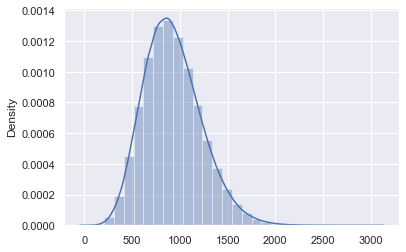

In [57]:
import numpy as np
from scipy import stats
import seaborn as sns
import math
sns.set()
mu,sigma=30,5
sample_size=1000
sample_square=np.array([np.square(np.random.normal(mu, sigma, sample_size)) for i in range(2000)]) #从服从平均值为30，标准差为5的正态分布中，随机提取2000个样本，每个样本容量为1000的样本，并计算每一样本的均值
bins=30
sns.distplot(sample_square,bins=bins) #查看2000个样本平方和的分布

使用SciPy库计算打印卡方分布及伽马分布

Chi_2_Check accuracy of cdf and ppf: True
Gamma_Check accuracy of cdf and ppf: True


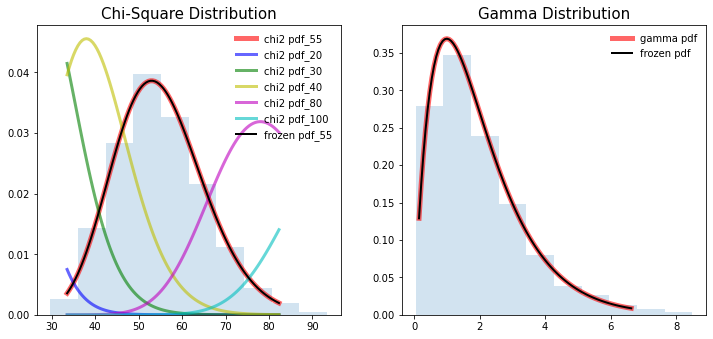

In [46]:
import matplotlib.pyplot as plt
from scipy.stats import chi2
import numpy as np

fig, axs=plt.subplots(1,2,figsize=(18/1.5,8/1.5)) 

#A-卡方分布
df=55
mean,var,skew,kurt=chi2.stats(df, moments='mvsk')
#打印卡方分布的概率密度函数 Display the probability density function (pdf)
x=np.linspace(chi2.ppf(0.01, df),chi2.ppf(0.99, df), 100)
axs[0].plot(x, chi2.pdf(x, df),'r-', lw=5, alpha=0.6, label='chi2 pdf_55')

df_lst=[20,30,40,80,100]
fmts=['b-','g-','y-','m-','c-']
for i in range(len(df_lst)):
    axs[0].plot(x, chi2.pdf(x, df_lst[i]),fmts[i], lw=3, alpha=0.6, label='chi2 pdf_%d'%df_lst[i])
    
#固定分布 Alternatively, freeze the distribution and display the frozen pdf
rv=chi2(df)
axs[0].plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf_55')

vals=chi2.ppf([0.001, 0.5, 0.999], df)
print("Chi_2_Check accuracy of cdf and ppf:",np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df)))

r=chi2.rvs(df, size=1000)
axs[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
axs[0].legend(loc='best', frameon=False)
               
#B-Gamma分布    
from scipy.stats import gamma
a=1.99323054838
mean_,var_,skew_,kurt_=gamma.stats(a, moments='mvsk')
#打印Gamma分布的概率密度函数 Display the probability density function (pdf):
x_= np.linspace(gamma.ppf(0.01, a),gamma.ppf(0.99, a), 100)
axs[1].plot(x_, gamma.pdf(x_, a),'r-', lw=5, alpha=0.6, label='gamma pdf')
#Alternatively, freeze the distribution and display the frozen pdf:
rv_= gamma(a)
axs[1].plot(x_, rv_.pdf(x_), 'k-', lw=2, label='frozen pdf')

vals = gamma.ppf([0.001, 0.5, 0.999], a)
print("Gamma_Check accuracy of cdf and ppf:",np.allclose([0.001, 0.5, 0.999], gamma.cdf(vals, a)))

r_=gamma.rvs(a, size=1000)
axs[1].hist(r_, density=True, histtype='stepfilled', alpha=0.2)
axs[1].legend(loc='best', frameon=False)

axs[0].set_title(r'Chi-Square Distribution', fontsize=15)
axs[1].set_title(r'Gamma Distribution', fontsize=15)
plt.show()               

#### 1.2.2 （卡方）独立性检验
卡方检验（Chi-Squared Test，或 $x^{2}$ Test）,是假设检验的一种,一种非参数假设检验，主要用于类别/分类变量（类别变量就是取值为离散值的变量，例如性别即为一个类别变量，有男女两类，又或者国籍、学科、植物等的类别等），在没有其他的限制条件或说明时，卡方检验一般指代的是皮尔森卡方(Pearson)检验。1900年，Pearson发表了著名的$x^{2}$检验的论文，假设实验中从总体随机取样得到的$n$个观察值被划分为$k$个互斥的分类中，这样每个分类都有一个对应实际的观察次数（或观测频数，observed frequencies）$ x_{i} (i=1,2, \ldots ,k)$。对实验中各个观察值落入第$i$个分类的概率$p_{i}$的分布提出零假设，获得对应所有第$i$分类的理论期望次数(或预期频数，expected frequencies)以及限制条件，$\sum_{i=1}^k  p_{i}  =1,and \: \sum_{i=1}^k  m_{i} =\sum_{i=1}^k  x_{i} =n$。在上述零假设成立以及$n$趋向$\infty $时，以下统计量的极限分布趋向$x^{2}$分布，$X^{2} = \sum_{i=1}^k  \frac{ ( x_{i} - m_{i} )^{2} }{m_{i}}  =\sum_{i=1}^k  \frac{ x_{i} ^{2} }{m_{i}} -n$。$X^{2}$值的计算公式通常表示为：$X^{2} =  \sum ( \frac{ (O-E)^{2} }{E} )$，其中，$O$为各个单元格（对列联表而言）的观测值（观测频数），$E$为各个单元格的预期值（预期频数）。零假设中所有分类的理论期望次数$m_{i}$均为足够大且已知的情况，同时假设各分类的实际观察次数$x_{i}$均服从正态分布，得出样本容量$n$足够大时，$x^{2}$趋近服从自由度为$(k-1)$的$x^{2}$分布。

通常将用于卡方检验的数据以表格的形式给出并依据表格进行计算，这个表格即为列联表(contingency tabel)。以*白话统计学*性别与专业的修订数据为例，


| 性别/专业      | 心理学 | 英语     |生物学 |行合计     |
| :---        |    :----:   |          ---: | ---: |---: |
| 男生      | 35       | 50  |15|100|
| 女生      | 30        | 25      |45|100|
| 列合计      | 65        | 75      |60|200|

利用表格每一单元格中的观测频数，以及行、列和整个样本的合计频数，计算每个单元格的预期频数。男女两行中每一单元格的预期值都相等，是因为样本中的男女生人数相等。并根据上述的$X^{2}$值的计算公式，计算$X^{2}$，其和为：0.19+0.19+4.17+4.17+7.5+7.5=23.72。

| 性别/专业      | 心理学 | 英语     |生物学 |
| :---        |    :----  |          :---| :--- |
| 男生      |    观测频数：35 </br>预期频数：$\frac{100 \times 65}{200} =32.5$ </br>$x^{2}$值：$ \frac{ (35-32.5)^{2} }{32.5} =0.19$   |观测频数：50 </br> 预期频数:$\frac{100 \times 75}{200} =37.5$</br> $x^{2}$值：$ \frac{ (50-37.5)^{2} }{37.5} =4.17$ |观测频数：15 </br> 预期频数: $\frac{100 \times 60}{200} =30$</br> $x^{2}$值：$ \frac{ (15-30)^{2} }{30} =7.5$ |
| 女生      | 观测频数：30 </br>预期频数 $\frac{100 \times 65}{200} =32.5$ </br>$x^{2}$值：$ \frac{ (30-32.5)^{2} }{32.5} =0.19$    |观测频数：25 </br> 预期频数:  $\frac{100 \times 75}{200} =37.5$ </br>$x^{2}$值：$ \frac{ (25-37.5)^{2} }{37.5} =4.17$ | 观测频数：45 </br> 预期频数: $\frac{100 \times 60}{200} =30$</br>$x^{2}$值：$ \frac{ (45-30)^{2} }{30} =7.5$ |

注意到$x^{2}$值较大是因为男女生在选择英语或生物专业时存在相对较大的差异。而心理学专业的观测值和预期值之差相对较小，对整体$x^{2}$值的贡献不大。获得观测的$x^{2}$值，则需要查表（或程序）查找临界$x^{2}$值，其自由度$df=(R-1)(C-1)=(2-1)\times(3-1)=2$，使用SciPy的`chi2.ppf(q=1-0.05,df=2)`计算可得0.05的$\alpha $水平，自由度为2的条件下临界$x^{2}$值为5.99，而观测的$x^{2}$值为23.72，所以可以得出结论，男女生在专业选择上存在统计显著的差异。而因为观测的$x^{2}$值足够大，在0.001的显著性水平上`chi2.ppf(q=1-0.001,df=2)`(临界值为13.815510557964274)，也是统计显著的（即$p<0.001$）。

In [66]:
print("𝑝<0.05,df=2,Chi-Squared=%.3f"%chi2.ppf(q=1-0.05,df=2))
print("𝑝<0.001,df=2,Chi-Squared=%.3f"%chi2.ppf(q=1-0.001,df=2))

𝑝<0.05,df=2,Chi-Squared=5.991
𝑝<0.001,df=2,Chi-Squared=13.816


使用SciPy的`chi2_contingency`方法计算列联表，其计算结果与手工计算结果保持一致。

In [111]:
from scipy.stats import chi2_contingency
import numpy as np
schoolboy=(35,50,15)
schoolgirl=(30,25,45)
statistical_data=np.array([schoolboy,schoolgirl])
chi2_results=chi2_contingency(statistical_data)
print("卡方值：%.3f \n P值：%.10f \n 自由度:%d \n 对应预期频数（期望值）：\n %s"%chi2_results)

卡方值：23.718 
 P值：0.0000070748 
 自由度:2 
 对应预期频数（期望值）：
 [[32.5 37.5 30. ]
 [32.5 37.5 30. ]]


### 1.3 基于POI位置信息研究城市生活圈的空间层级变化特征
在POI部分阐述了数据爬取的方法，并将数据分别存储为.csv和.json两种数据格式。此处读取已经保存的.json数据格式的POI，提取经纬度信息('location')和分类信息('tag')，并将其保存为sklearn的Bunch数据格式。


In [2]:
import util
import os

def poi_json2sklearn_bunch(fps):
    import json
    from sklearn.preprocessing import LabelEncoder
    from sklearn.datasets import base
    import numpy as np
    '''
    function - 提取分析所需数据，并转换为skleran的bunch存储方式，统一格式，方便读取。(注意poi行业分类类标的设置)
    
    Paras:
    fps - .json文件列表
    '''
    poi_info=[]
    KeyError_count=0
    for fn in fps:
        with open(fn,'r') as f:
            json_decodes=json.load(f)
        for info in json_decodes:          
            try:
                poi_info.append((info['location']['lat'],info['location']['lng'],info['detail_info']['tag']))
            except KeyError: #有些数据中不包含'tag'信息，即没有该字典的键
                KeyError_count+=1   
  
    print("Oops! KeyError_count:%d"%KeyError_count)
    poi_coordi=np.array([(v[0],v[1]) for v in poi_info])  #经纬度信息
    poi_classification=[v[2].split(';') for v in poi_info]
    poi_classifi_firstLevle=np.array([v[0] for v in poi_classification])  #一级分类信息
    poi_classifi_secondLevle=np.array([v[1] if len(v)>1 else 'None' for v in poi_classification ])  #二级分类信息，处理可能不存在二级分类名的情况
     
    class_label=LabelEncoder()  #以整数形式编码分类名
    poiLabel_1=class_label.fit_transform(poi_classifi_firstLevle)    
    poiLabel_1_mapping=[(idx,label) for idx,label in enumerate(class_label.classes_)]  #建立一级分类名和整数编码的映射列表
    
    poiLabel_2=class_label.fit_transform(poi_classifi_secondLevle)
    poiLabel_2_mapping=[(idx,label) for idx,label in enumerate(class_label.classes_)]  #建立二级分类名和整数编码的映射列表

    data=poi_coordi
    target=np.stack((poiLabel_1,poiLabel_2),axis=-1)
    target_names={'1_level_label':poiLabel_1_mapping,'2_level_label':poiLabel_2_mapping}
    dataBunch=base.Bunch(DESCR=r'spatial points datasets of poi',data=data,feature_names=["XCoordinate","yCoordinate"],target=target,target_names=target_names)  #建立sklearn的数据存储格式bunch
    return dataBunch

dirpath='./data/poi_batchCrawler/'
fileType=["json"]
poi_paths=util.filePath_extraction(dirpath,fileType)

'''展平列表函数'''
flatten_lst=lambda lst: [m for n_lst in lst for m in flatten_lst(n_lst)] if type(lst) is list else [lst]
poi_fp=flatten_lst([[os.path.join(key,val) for val in poi_paths[key]] for key in poi_paths.keys()])

poi_dataBunch=poi_json2sklearn_bunch(poi_fp)    

Oops! KeyError_count:254


A-连续距离聚类结果保存为.shp格式数据，及打印一组预览
聚类距离：20_POI 卡方值：23084.983  P值：1.0000000000  自由度:69237
聚类距离：30_POI 卡方值：33845.719  P值：1.0000000000  自由度:82740
聚类距离：40_POI 卡方值：42279.737  P值：1.0000000000  自由度:85071
聚类距离：50_POI 卡方值：47139.868  P值：1.0000000000  自由度:79422
聚类距离：60_POI 卡方值：50192.763  P值：1.0000000000  自由度:72303
聚类距离：70_POI 卡方值：50138.496  P值：1.0000000000  自由度:63378
聚类距离：80_POI 卡方值：49995.433  P值：1.0000000000  自由度:55545
聚类距离：90_POI 卡方值：48486.680  P值：0.1131180285  自由度:48111
聚类距离：100_POI 卡方值：46080.596  P值：0.0000000000  自由度:41769
聚类距离：110_POI 卡方值：44583.063  P值：0.0000000000  自由度:36750
聚类距离：120_POI 卡方值：41960.353  P值：0.0000000000  自由度:32130
聚类距离：130_POI 卡方值：38586.597  P值：0.0000000000  自由度:27951
聚类距离：140_POI 卡方值：36238.702  P值：0.0000000000  自由度:24171
聚类距离：150_POI 卡方值：33629.968  P值：0.0000000000  自由度:20790
聚类距离：160_POI 卡方值：31905.756  P值：0.0000000000  自由度:18396
聚类距离：170_POI 卡方值：29726.546  P值：0.0000000000  自由度:16212
聚类距离：180_POI 卡方值：29027.130  P值：0.0000000000  自由度:14616
聚类距离：190_POI 卡方值：26204.369  P值：0.0000000000

  0%|          | 0/50 [00:00<?, ?it/s]

聚类距离：480_POI 卡方值：5189.559  P值：0.0000000000  自由度:945
聚类距离：490_POI 卡方值：4967.444  P值：0.0000000000  自由度:861
聚类距离：500_POI 卡方值：4688.195  P值：0.0000000000  自由度:777
聚类距离：510_POI 卡方值：4666.877  P值：0.0000000000  自由度:735


100%|██████████| 50/50 [00:43<00:00,  1.14it/s]

Failed at key: ['410_POI', '450_POI', '470_POI', '510_POI']


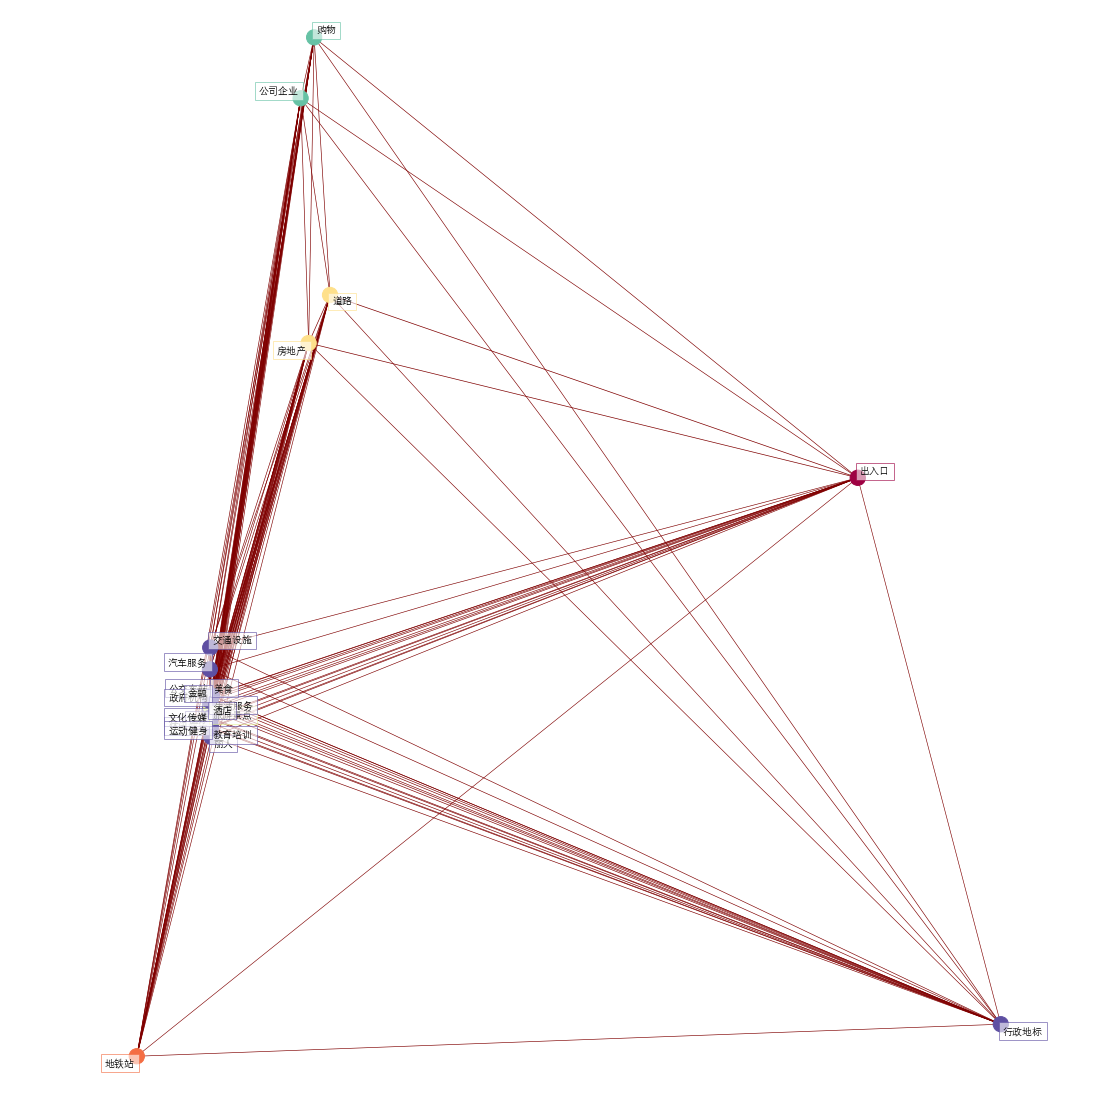

In [6]:
class poi_spatial_distribution_structure:
    '''
    function - 使用DBSCAN算法实现连续距离聚类和空间结构分析

    Paras:
    poi_dataBunch - 待聚类的数据，包括地理空间点坐标，类标，以及类标映射
    eps - 聚类距离
    min_samples - 邻域样本数量
    '''
    def __init__(self,poi_dataBunch,eps,min_samples,save_path):        
        self.data_degree=poi_dataBunch.data
        self.data_dist=poi_dataBunch.data*(2 * math.pi * 6378137.0)/ 360 #如果读取的是度，将其转换为距离单位
        self.eps=eps
        self.min_samples=min_samples
        self.save_path=save_path           
        self.poi_label=poi_dataBunch.target[:,0]   
        self.label_1_mapping=poi_dataBunch.target_names["1_level_label"]       
        
    def frequency_array(slef,array):
        '''
        function - 打印数组频数
        
        Paras:
        array - 待统计数组
        '''
        unique, counts=np.unique(array, return_counts=True)
        print(np.asarray((unique, counts)).T)        
    
    def clustering_DBSCAN(self,eps_single):
        import time
        from sklearn import cluster
        import numpy as np
        '''
        function - 单次聚类
        
        Paras:
        eps_single - 单次聚类距离
        '''
        db=cluster.DBSCAN(eps=eps_single,min_samples=self.min_samples,metric='euclidean') #meter=degree*(2 * math.pi * 6378137.0)/ 360  degree=50/(2 * math.pi * 6378137.0) * 360，在调参时，eps为邻域的距离阈值，而分析的数据为经纬度数据，为了便于调参，可依据上述公式可以在米和度之间互相转换，此时设置eps=0.0008，约为90m，如果poi的空间点之间距离在90m内则为一簇；min_samples为样本点要成为核心对象所需要的邻域样本数阈值。参数需要自行根据所分析的数据不断调试，直至达到较好聚类的结果。
        y_pred=db.fit_predict(self.data_dist)  #获取聚类预测类标

        return y_pred,np.unique(y_pred)          

    def clustering_batch_computing(self):
        from tqdm import tqdm 
        import numpy as np
        import pandas as pd
        '''
        function - 根据聚类距离列表批量处理（聚类）
        '''          
        global poi_clusteringPred_dict #存储聚类预测结果，配置为类的全局变量，避免重复计算   
        poi_clusteringPred_dict={}
        for eps_single in tqdm(self.eps):
            y_pred,pred_label=self.clustering_DBSCAN(eps_single)
            field_name=r'%s_POI'%eps_single #字符串格式化输出文件名
            poi_clusteringPred_dict[field_name]=y_pred   
        print("完成连续距离聚类计算！")
        
    def poi2shp(self):
        import os
        import geopandas as gpd
        from shapely.geometry import Point   
        import pandas as pd
        '''
        function - 保存聚类结果于.shp文件中,及打印一组预览
        
        Paras:
        poi_df - 包含地理坐标，和聚类预测值的DataFrame格式数据
        save_path - 保存的根目录
        '''
        print("A-连续距离聚类结果保存为.shp格式数据，及打印一组预览")
        save_fp=os.path.join(self.save_path,'poi_clustering_pred.shp')
        
        poi_clusteringPred_df=pd.DataFrame.from_dict(poi_clusteringPred_dict)
        poi_coordi_df=pd.DataFrame(self.data_degree,columns=('lat','lon'))     
        poi_concat_df=pd.concat([poi_coordi_df,poi_clusteringPred_df],axis=1)        
        
        poi_geoDF=poi_concat_df.copy(deep=True)
        poi_geoDF['geometry']=poi_geoDF.apply(lambda row:Point(row.lon,row.lat),axis=1) 
        crs={'init': 'epsg:4326'} #配置坐标系统，参考：https://spatialreference.org/  
        poi_gpd=gpd.GeoDataFrame(poi_geoDF,crs=crs)
        poi_gpd_clean=poi_gpd.dropna(subset=['lon','lat'])
        poi_gpd_clean.to_file(save_fp)
        poi_gpd_clean.plot(column=poi_gpd_clean.columns[3],markersize=1,figsize=(15,15))           
        
    def poi_chi_2Test(self):
        from scipy.stats import chi2_contingency
        import numpy as np        
        import pickle,os
        '''
        function - 卡方独立性检验，分析POI一级行业分类类标与聚类簇的相关性
        '''        
        global CT_dict
        CT_dict={}
        chi_2Test_dict={}
        for key in poi_clusteringPred_dict.keys():
            pred_label=np.hstack((poi_clusteringPred_dict[key].reshape(-1,1),self.poi_label.reshape(-1,1))) #水平组合聚类预测值和行业分类类标    
            label_pred=[]
            for i in range(len(np.array(self.label_1_mapping)[...,0])): #按行业类标重新组织数据，每行对应行业类标所有的聚类预测值
                label_pred.append(pred_label[pred_label[...,-1]==int(np.array(self.label_1_mapping)[...,0][i])])           
            label_cluster_frequency={}
            for p in label_pred:  #按行业类标计算每类所有点所属聚类簇的数量(频数)
                label_cluster_frequency[(p[...,-1][0])]=[(j,np.sum(p[...,0]==int(j))+1) for j in np.unique(poi_clusteringPred_dict[key]) if j!=-1] #独立性检验值不能为零，因此将所有值+1   
            CT_target=list(label_cluster_frequency.keys())
            CT_idx=np.array(list(label_cluster_frequency.values()))
            CT=CT_idx[...,1]  #建立用于独立性分析的列联表，横向为行业类所属聚类簇频数，纵向为行业类标
            CT_dict[key]=CT
            chi2_test=chi2_contingency(CT)  #列联表的卡方独立性检验  
            chi_squared_val, p, df,expected_frequencies=chi2_test #提取卡方值g，p值，自由度dof和与元数据数组同维度的对应理论值。此次实验计算p=0.00120633349692，小于0.05，因此行业分类与聚类簇相关。
            print("聚类距离：%s 卡方值：%.3f  P值：%.10f  自由度:%d"%(key,chi_squared_val, p, df))
            chi_2Test_dict[key]=chi2_test
        with open(os.path.join(self.save_path,'chi_2Test_dict.json'),'wb') as f:
            pickle.dump(chi_2Test_dict,f)

    def POI_structure(self):
        from sklearn import cluster, covariance, manifold
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
        from matplotlib.collections import LineCollection
        from tqdm import tqdm
        
        from pylab import mpl
        mpl.rcParams['font.sans-serif']=['DengXian'] #解决中文字符乱码问题
        
        import warnings
        warnings.filterwarnings("ignore") #如果需要查看warning提示，需要注释掉该行
        '''
        function - POI一级行业分类的业态结构.参考官方案例Visualizing the stock market structure：http://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html#sphx-glr-auto-examples-applications-plot-stock-market-py
        '''
        savefig_root=os.path.join(self.save_path,'POI_structure')
        if not os.path.exists(savefig_root):
            os.makedirs(savefig_root)
        #A-从相关性中学习图结构。Learn a graphical structure from the correlations
        edge_model=covariance.GraphicalLassoCV() 
        failed_edge_model_key=[]
        for key in tqdm(CT_dict.keys()):            
            X=CT_dict[key].copy().T  
            X=X/X.std(axis=0)  #标准化。可以自行实验小规模数组，查看变化，分析结果，获取结论。
            try:
                edge_model.fit(X)            
            except FloatingPointError:
                failed_edge_model_key.append(key)                
            
            #B-使用affinity propagation聚类。Cluster using affinity propagation
            _, labels=cluster.affinity_propagation(edge_model.covariance_)
            n_labels=labels.max()            

            #C-We use a dense eigen_solver to achieve reproducibility (arpack is initiated with random vectors that we don't control). In addition, we use a large number of neighbors to capture the large-scale structure.
            node_position_model=manifold.LocallyLinearEmbedding(n_components=2, eigen_solver='dense', n_neighbors=6)
            embedding=node_position_model.fit_transform(X.T).T   
            
            #D-图表可视化poi空间分布结构
            plt.figure(1, facecolor='w', figsize=(10, 8))
            plt.clf()
            ax=plt.axes([0., 0., 1., 1.]) #可以参考官方示例程序 http://matplotlib.org/examples/pylab_examples/axis_equal_demo.html
            plt.axis('off')    

            # Display a graph of the partial correlations/偏相关分析:在多要素所构成的系统中，当研究某一个要素对另一个要素的影响或相关程度时，把其他要素的影响视作常数（保持不变），即暂时不考虑其他要素影响，单独研究两个要素之间的相互关系的密切程度，所得数值结果为偏相关系数。在多元相关分析中，简单相关系数可能不能够真实的反映出变量X和Y之间的相关性，因为变量之间的关系很复杂，它们可能受到不止一个变量的影响。这个时候偏相关系数是一个更好的选择。
            partial_correlations=edge_model.precision_.copy()
            d=1/np.sqrt(np.diag(partial_correlations)) #umpy.diag()返回一个矩阵的对角线元素，计算该元素平方根的倒数。
            partial_correlations*=d
            partial_correlations*=d[:, np.newaxis]
            non_zero=(np.abs(np.triu(partial_correlations, k=1)) > 0.02) #np.triu()返回矩阵的上三角矩阵。

            # Plot the nodes using the coordinates of our embedding    
            plt.scatter(embedding[0], embedding[1], s=300*d**2, c=labels,cmap=plt.cm.Spectral) #簇类标用于定义节点的颜色，降维后数据作为点坐标

            # Plot the edges
            start_idx, end_idx=np.where(non_zero)  #numpy.where(condition[, x, y])这里x,y是可选参数，condition是条件，这三个输入参数都是array_like的形式；而且三者的维度相同。当conditon的某个位置的为true时，输出x的对应位置的元素，否则选择y对应位置的元素；如果只有参数condition，则函数返回为true的元素的坐标位置信息；
            segments=[[embedding[:, start], embedding[:, stop]] for start, stop in zip(start_idx, end_idx)]
            values=np.abs(partial_correlations[non_zero])
            cm=plt.cm.get_cmap('OrRd') #具体的`matplotlib.colors.Colormap'实例可以查看matplotlib官网 http://matplotlib.org/users/colormaps.html，替换不同色系
            lc=LineCollection(segments,zorder=0,cmap=cm,norm=plt.Normalize(0, .7 * values.max()))  
            lc.set_array(values) 
            lc.set_linewidths(15 * values) #定义边缘的强度。
            ax.add_collection(lc)

            # Add a label to each node. The challenge here is that we want to position the labels to avoid overlap with other labels，添加行业分类标签，并避免标签重叠。
            names=[i[-1] for i in self.label_1_mapping]
            for index, (name, label, (x, y)) in enumerate(zip(names, labels, embedding.T)):    
                dx = x - embedding[0]
                dx[index] = 1
                dy = y - embedding[1]
                dy[index] = 1
                this_dx = dx[np.argmin(np.abs(dy))]
                this_dy = dy[np.argmin(np.abs(dx))]
                if this_dx > 0:
                    horizontalalignment = 'left'
                    x = x + .002
                else:
                    horizontalalignment = 'right'
                    x = x - .002
                if this_dy > 0:
                    verticalalignment = 'bottom'
                    y = y + .002
                else:
                    verticalalignment = 'top'
                    y = y - .002
                plt.text(x, y, name, size=10,horizontalalignment=horizontalalignment,verticalalignment=verticalalignment,bbox=dict(facecolor='w',edgecolor=plt.cm.Spectral(label/float(n_labels)),alpha=.6))    
            plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),embedding[0].max() + .10 * embedding[0].ptp(),) #numpy.ptp()极差函数返回沿轴的值的范围(最大值-最小值)。
            plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),embedding[1].max() + .03 * embedding[1].ptp())              

            plt.savefig(os.path.join(self.save_path,'POI_structure/structure_%s'%key))  #保存打印的图表
        print("Failed at key:",failed_edge_model_key)    
        plt.show() #仅显示最后一个图表              
            
import math
eps=list(range(20,520,10)) #设置多个聚类距离，单位m
min_samples=3
save_path=r'./data/poi_clustering'

#A-执行类的实例化
batchClustering_DBSCAN=poi_spatial_distribution_structure(poi_dataBunch,eps,min_samples,save_path) 

#B-执行聚类，计算时间相对较长，计算完成后，计算结果存储在全局变量中。判断该变量是否存在，避免重复计算
if 'poi_clusteringPred_dict' in globals():pass
else: batchClustering_DBSCAN.clustering_batch_computing() 
#C- 保存聚类结果于.shp文件中,及打印一组预览
batchClustering_DBSCAN.poi2shp()
#D-执行独立性检验
batchClustering_DBSCAN.poi_chi_2Test()
#E-POI一级行业分类的业态结构
batchClustering_DBSCAN.POI_structure()